# Import Necessary Library

In [1]:
import pandas as pd
import sys
import os

sys.path.append(os.path.abspath(".."))
from EDA import Exploratory


explor = Exploratory()

## Data Heterogen

In [2]:
#Importing Data Using Pandas
data = pd.read_csv(r'C:\Users\ASUS\MedCheckProject\Dataset\data_clean.csv')
data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [3]:
#Checking Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2764 entries, 0 to 2763
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  2764 non-null   object
 1   JoiningYear                2764 non-null   int64 
 2   City                       2764 non-null   object
 3   PaymentTier                2764 non-null   int64 
 4   Age                        2764 non-null   int64 
 5   Gender                     2764 non-null   object
 6   EverBenched                2764 non-null   object
 7   ExperienceInCurrentDomain  2764 non-null   int64 
 8   LeaveOrNot                 2764 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 194.5+ KB


In [7]:
data['LeaveOrNot'] = data['LeaveOrNot'].astype('object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2764 entries, 0 to 2763
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  2764 non-null   object
 1   JoiningYear                2764 non-null   int64 
 2   City                       2764 non-null   object
 3   PaymentTier                2764 non-null   int64 
 4   Age                        2764 non-null   int64 
 5   Gender                     2764 non-null   object
 6   EverBenched                2764 non-null   object
 7   ExperienceInCurrentDomain  2764 non-null   int64 
 8   LeaveOrNot                 2764 non-null   object
dtypes: int64(4), object(5)
memory usage: 194.5+ KB


## Splitting Data to NUM and CAT for analysis purpose

In [9]:
data_num = data.select_dtypes(include=['number'])
data_num

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain
0,2017,3,34,0
1,2013,1,28,3
2,2014,3,38,2
3,2016,3,27,5
4,2017,3,24,2
...,...,...,...,...
2759,2017,2,31,2
2760,2016,3,30,2
2761,2013,2,37,2
2762,2018,3,27,5


In [10]:
data_cat = data.select_dtypes(exclude=['number'])
data_cat

,Education,City,Gender,EverBenched,LeaveOrNot
0,Bachelors,Bangalore,Male,No,0
1,Bachelors,Pune,Female,No,1
2,Bachelors,New Delhi,Female,No,0
3,Masters,Bangalore,Male,No,1
4,Masters,Pune,Male,Yes,1
...,...,...,...,...,...
2759,Masters,Pune,Female,No,0
2760,Bachelors,Pune,Male,No,0
2761,Masters,Pune,Male,No,1
2762,Masters,New Delhi,Male,No,1


## Visualisasi Heterogen

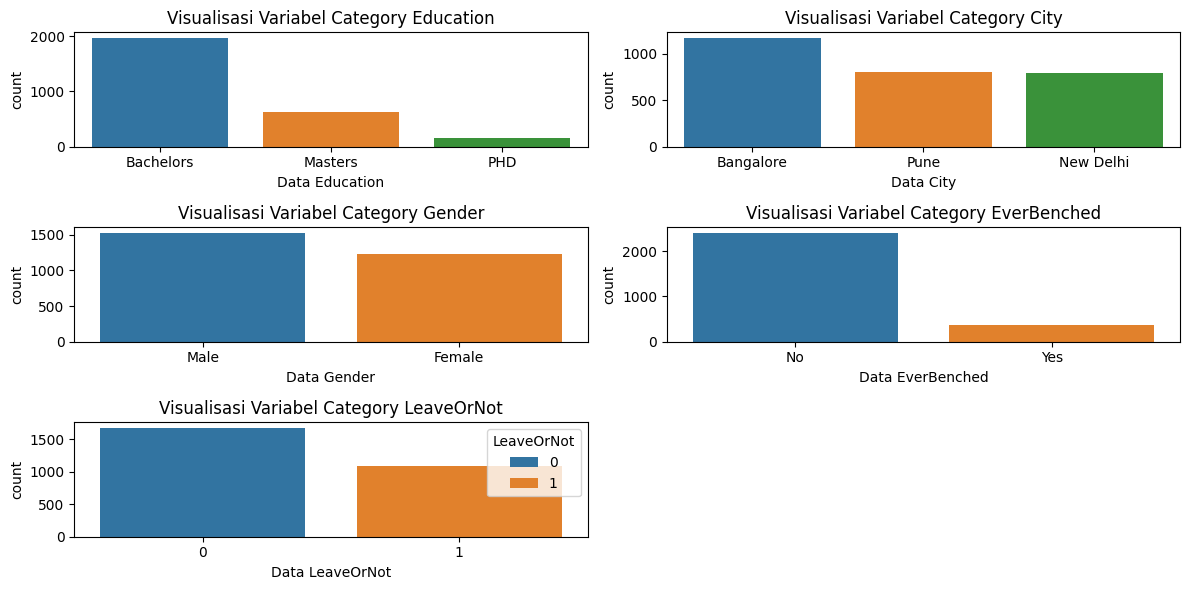

In [11]:
explor.visualcount(data_cat, 2, 3)

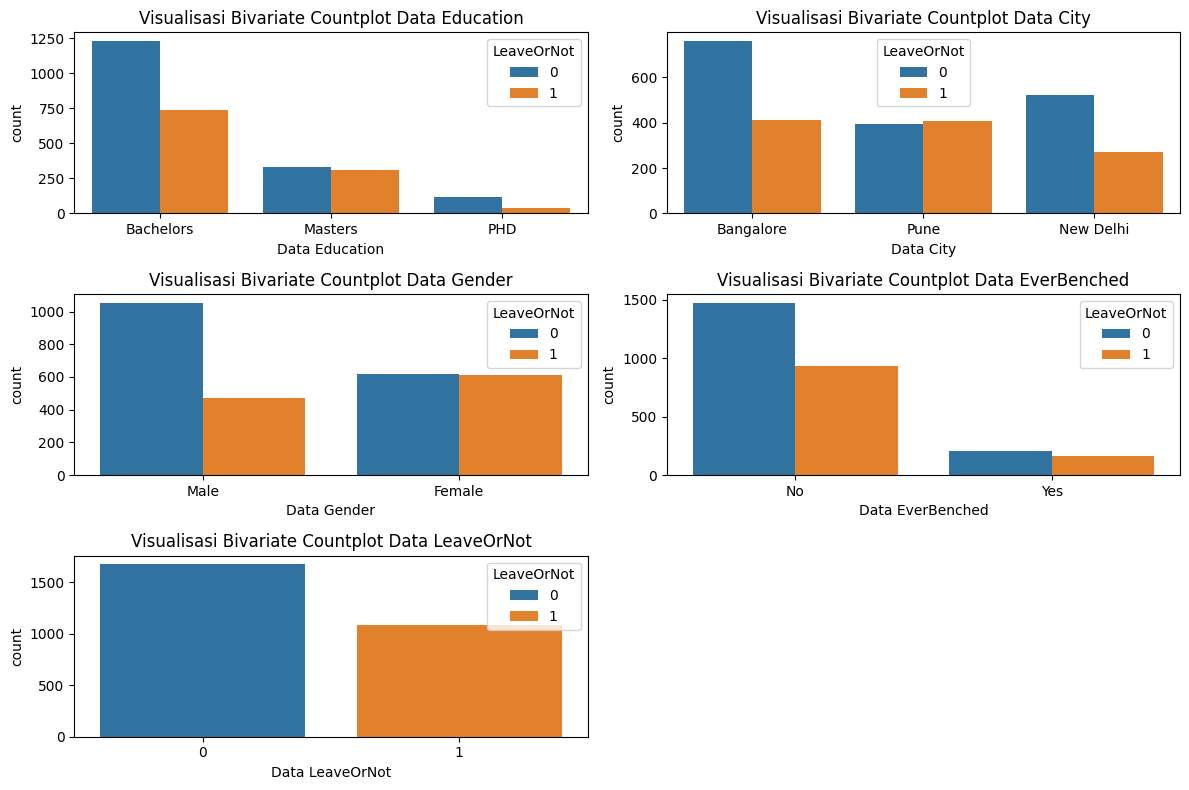

In [13]:
explor.visualcatplotdouble(data_cat, 2, 3, 'LeaveOrNot')

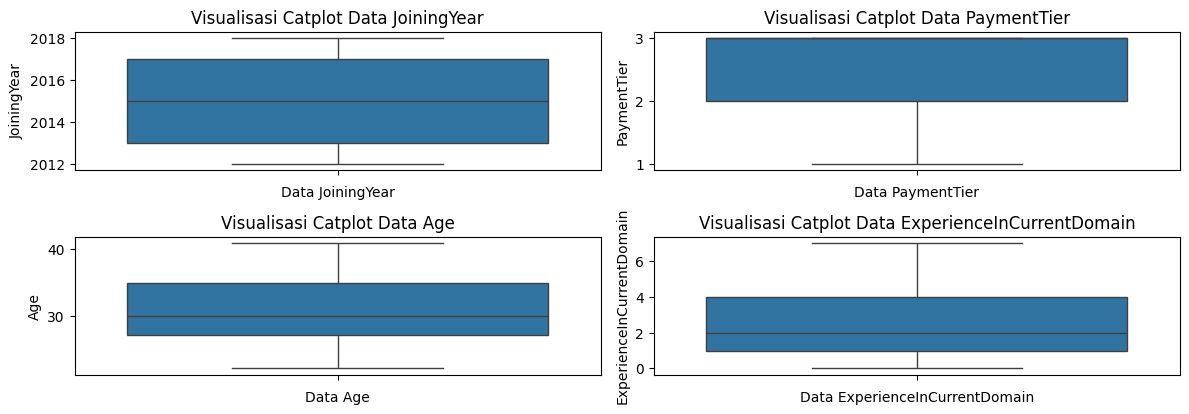

In [14]:
explor.visualcatplot(data_num, 2,3)

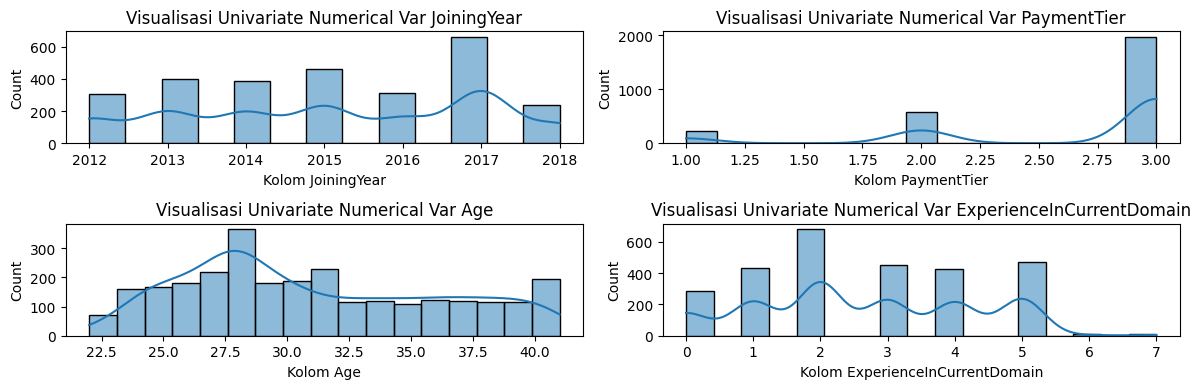

In [15]:
explor.visualnumvar(data_num, 2, 2)

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [18]:
data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [19]:
data_2_transform = ['Education', 'City', 'Gender', 'EverBenched']

for i in data_2_transform:
    data[i] = le.fit_transform(data[i])

data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1


In [20]:
corr_num = data.corr()

<Axes: >

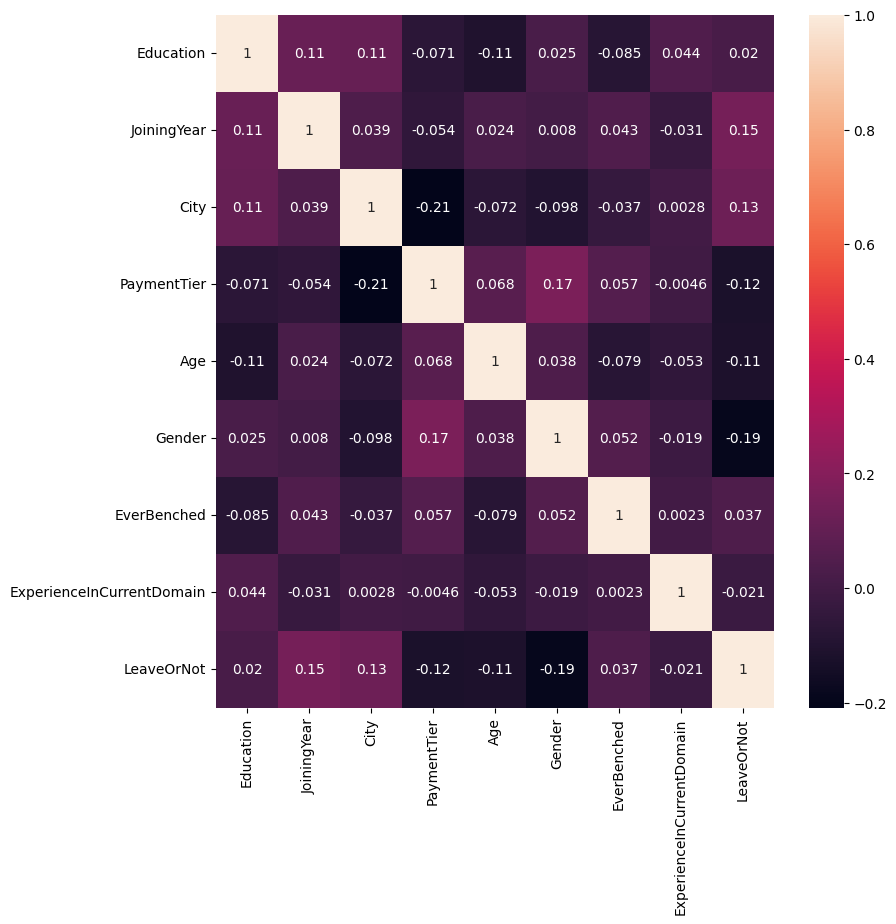

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(9,9))
sns.heatmap(corr_num, annot=True)

In [22]:
data.to_csv(r'C:\Users\ASUS\MedCheckProject\Dataset\data_hetero_ready.csv', index=False)

# Data Homogen

In [23]:
data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1


In [24]:
data['JoiningYear'].value_counts()

JoiningYear
2017    662
2015    464
2013    396
2014    385
2016    310
2012    308
2018    239
Name: count, dtype: int64

In [26]:
data['Age'].min()

np.int64(22)

In [27]:
data['Age'].max()

np.int64(41)

In [28]:
data.loc[data['Age'] <=30, 'AgeCat'] = 'Young Adults'
data.loc[data['Age']>30, 'AgeCat'] = 'Middle-aged Adults'
data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,AgeCat
0,0,2017,0,3,34,1,0,0,0,Middle-aged Adults
1,0,2013,2,1,28,0,0,3,1,Young Adults
2,0,2014,1,3,38,0,0,2,0,Middle-aged Adults
3,1,2016,0,3,27,1,0,5,1,Young Adults
4,1,2017,2,3,24,1,1,2,1,Young Adults


In [31]:
data[data['Age'] > 30]

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,AgeCat
0,0,2017,0,3,34,1,0,0,0,Middle-aged Adults
2,0,2014,1,3,38,0,0,2,0,Middle-aged Adults
6,0,2015,1,3,38,1,0,0,0,Middle-aged Adults
7,0,2016,0,3,34,0,0,2,1,Middle-aged Adults
9,1,2017,1,2,37,1,0,2,0,Middle-aged Adults
...,...,...,...,...,...,...,...,...,...,...
2756,0,2016,0,1,33,0,0,0,1,Middle-aged Adults
2757,0,2013,0,3,31,0,0,5,0,Middle-aged Adults
2758,0,2015,2,3,32,0,1,1,1,Middle-aged Adults
2759,1,2017,2,2,31,0,0,2,0,Middle-aged Adults


In [32]:
data[data['Age']<=30]

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,AgeCat
1,0,2013,2,1,28,0,0,3,1,Young Adults
3,1,2016,0,3,27,1,0,5,1,Young Adults
4,1,2017,2,3,24,1,1,2,1,Young Adults
5,0,2016,0,3,22,1,0,0,0,Young Adults
8,0,2016,2,3,23,1,0,1,0,Young Adults
...,...,...,...,...,...,...,...,...,...,...
2748,2,2012,0,3,30,0,0,4,0,Young Adults
2755,0,2017,0,3,28,1,0,0,1,Young Adults
2760,0,2016,2,3,30,1,0,2,0,Young Adults
2762,1,2018,1,3,27,1,0,5,1,Young Adults


In [33]:
data

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,AgeCat
0,0,2017,0,3,34,1,0,0,0,Middle-aged Adults
1,0,2013,2,1,28,0,0,3,1,Young Adults
2,0,2014,1,3,38,0,0,2,0,Middle-aged Adults
3,1,2016,0,3,27,1,0,5,1,Young Adults
4,1,2017,2,3,24,1,1,2,1,Young Adults
...,...,...,...,...,...,...,...,...,...,...
2759,1,2017,2,2,31,0,0,2,0,Middle-aged Adults
2760,0,2016,2,3,30,1,0,2,0,Young Adults
2761,1,2013,2,2,37,1,0,2,1,Middle-aged Adults
2762,1,2018,1,3,27,1,0,5,1,Young Adults


In [34]:
data_homo = data.copy()
data_homo

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,AgeCat
0,0,2017,0,3,34,1,0,0,0,Middle-aged Adults
1,0,2013,2,1,28,0,0,3,1,Young Adults
2,0,2014,1,3,38,0,0,2,0,Middle-aged Adults
3,1,2016,0,3,27,1,0,5,1,Young Adults
4,1,2017,2,3,24,1,1,2,1,Young Adults
...,...,...,...,...,...,...,...,...,...,...
2759,1,2017,2,2,31,0,0,2,0,Middle-aged Adults
2760,0,2016,2,3,30,1,0,2,0,Young Adults
2761,1,2013,2,2,37,1,0,2,1,Middle-aged Adults
2762,1,2018,1,3,27,1,0,5,1,Young Adults


In [35]:
data['AgeCat'].value_counts()

AgeCat
Young Adults          1528
Middle-aged Adults    1236
Name: count, dtype: int64

In [36]:
data_homo['year_born'] = data_homo['JoiningYear'] - data['Age']
data_homo

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,AgeCat,year_born
0,0,2017,0,3,34,1,0,0,0,Middle-aged Adults,1983
1,0,2013,2,1,28,0,0,3,1,Young Adults,1985
2,0,2014,1,3,38,0,0,2,0,Middle-aged Adults,1976
3,1,2016,0,3,27,1,0,5,1,Young Adults,1989
4,1,2017,2,3,24,1,1,2,1,Young Adults,1993
...,...,...,...,...,...,...,...,...,...,...,...
2759,1,2017,2,2,31,0,0,2,0,Middle-aged Adults,1986
2760,0,2016,2,3,30,1,0,2,0,Young Adults,1986
2761,1,2013,2,2,37,1,0,2,1,Middle-aged Adults,1976
2762,1,2018,1,3,27,1,0,5,1,Young Adults,1991


In [37]:
data_homo['year_born'].value_counts()

year_born
1987    213
1989    209
1986    202
1988    198
1985    181
1984    153
1983    153
1990    145
1977    122
1982    121
1991    119
1976    116
1980    115
1978    115
1979    111
1981    110
1992     89
1975     75
1993     67
1974     50
1994     31
1973     30
1972     23
1995      8
1971      8
Name: count, dtype: int64

In [ ]:
data_homo['year_born'].min()


np.int64(1971)

In [41]:
data_homo['year_born'].max()

np.int64(1995)

In [ ]:
data_homo.loc[(data_homo['year_born'] >= 1965) & (data_homo['year_born']<=1980), 'GenerationCat'] = 'Gen X'
data_homo.loc[(data_homo['year_born'] > 1980) & (data_homo['year_born']<=1996), 'GenerationCat'] = 'Gen Y'
data_homo

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,AgeCat,year_born,GenerationCat
0,0,2017,0,3,34,1,0,0,0,Middle-aged Adults,1983,Gen Y
1,0,2013,2,1,28,0,0,3,1,Young Adults,1985,Gen Y
2,0,2014,1,3,38,0,0,2,0,Middle-aged Adults,1976,Gen X
3,1,2016,0,3,27,1,0,5,1,Young Adults,1989,Gen Y
4,1,2017,2,3,24,1,1,2,1,Young Adults,1993,Gen Y
...,...,...,...,...,...,...,...,...,...,...,...,...
2759,1,2017,2,2,31,0,0,2,0,Middle-aged Adults,1986,Gen Y
2760,0,2016,2,3,30,1,0,2,0,Young Adults,1986,Gen Y
2761,1,2013,2,2,37,1,0,2,1,Middle-aged Adults,1976,Gen X
2762,1,2018,1,3,27,1,0,5,1,Young Adults,1991,Gen Y


In [ ]:
data_2_drop = ['JoiningYear', 'Age', 'year_born']
data_homo = data_homo.drop(data_2_drop, axis=1)
data_homo

,Education,City,PaymentTier,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,AgeCat,GenerationCat
0,0,0,3,1,0,0,0,Middle-aged Adults,Gen Y
1,0,2,1,0,0,3,1,Young Adults,Gen Y
2,0,1,3,0,0,2,0,Middle-aged Adults,Gen X
3,1,0,3,1,0,5,1,Young Adults,Gen Y
4,1,2,3,1,1,2,1,Young Adults,Gen Y
...,...,...,...,...,...,...,...,...,...
2759,1,2,2,0,0,2,0,Middle-aged Adults,Gen Y
2760,0,2,3,1,0,2,0,Young Adults,Gen Y
2761,1,2,2,1,0,2,1,Middle-aged Adults,Gen X
2762,1,1,3,1,0,5,1,Young Adults,Gen Y


## Transform to AllNum

In [47]:
data_2_transform = ['AgeCat', 'GenerationCat']
for i in data_2_transform:
    data_homo[i] = le.fit_transform(data_homo[i])

data_homo

,Education,City,PaymentTier,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,AgeCat,GenerationCat
0,0,0,3,1,0,0,0,0,1
1,0,2,1,0,0,3,1,1,1
2,0,1,3,0,0,2,0,0,0
3,1,0,3,1,0,5,1,1,1
4,1,2,3,1,1,2,1,1,1
...,...,...,...,...,...,...,...,...,...
2759,1,2,2,0,0,2,0,0,1
2760,0,2,3,1,0,2,0,1,1
2761,1,2,2,1,0,2,1,0,0
2762,1,1,3,1,0,5,1,1,1


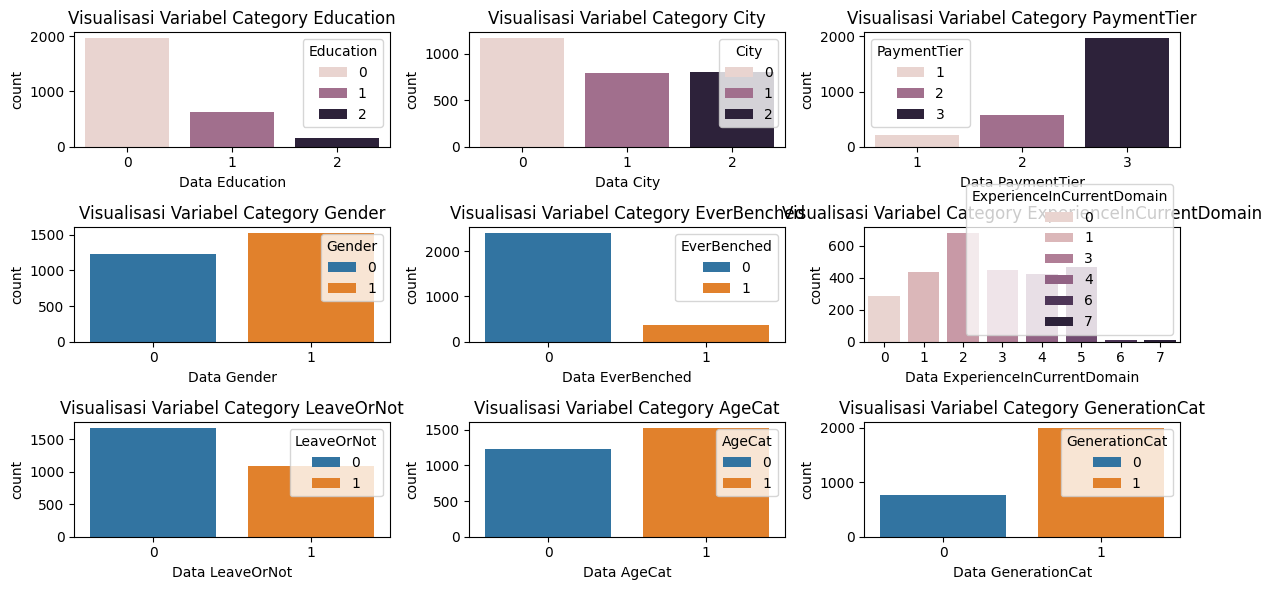

In [48]:
explor.visualcount(data_homo, 3, 3)

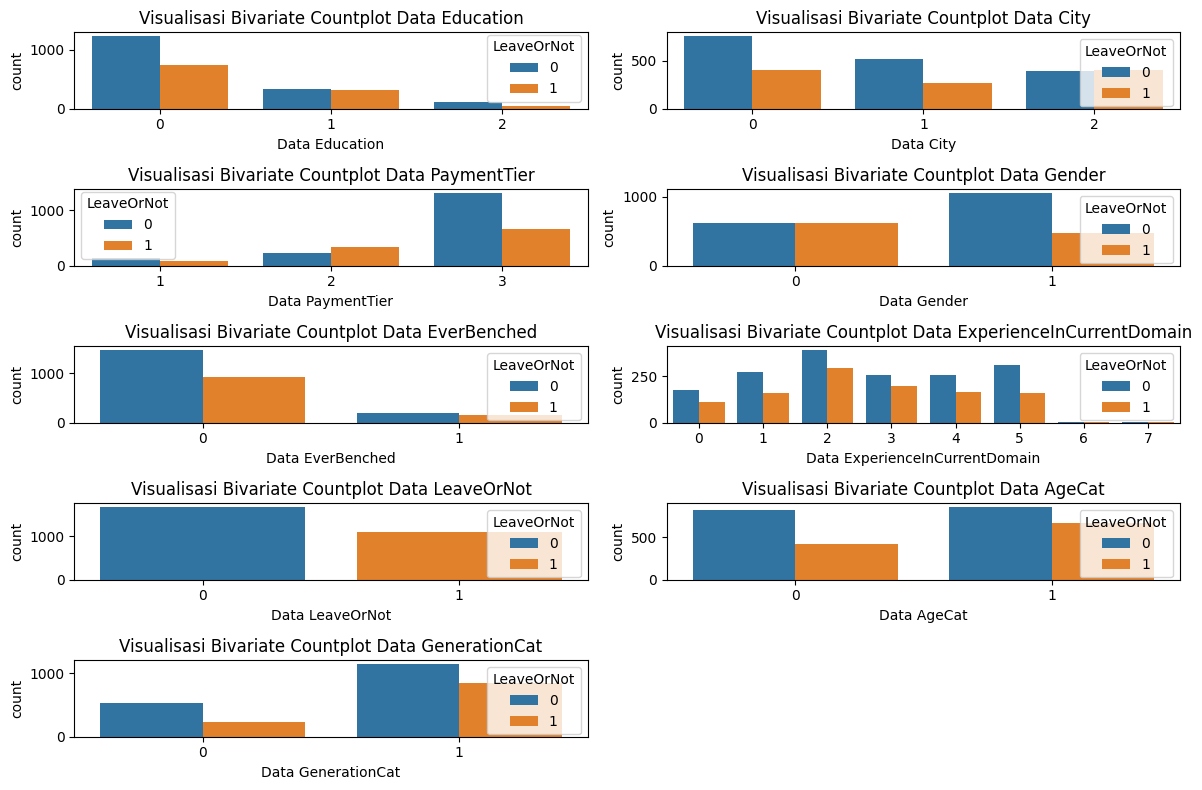

In [49]:
explor.visualcatplotdouble(data_homo, 2, 5, 'LeaveOrNot')

In [50]:
data_homo.to_csv(r'C:\Users\ASUS\MedCheckProject\Dataset\data_homo_ready.csv', index=False)